In [5]:
from dotenv import dotenv_values
import requests
import folium
import pandas as pd

In [6]:
base_path = 'https://api.openrouteservice.org/'
profile_car = 'driving-car'
# environment vars
config = dotenv_values("../.env")
ors_api_key = config['ORS_API_KEY']
# endpoints
directions_endpoint = 'v2/directions/'
geocode_search_endpoint = 'geocode/search'

In [7]:
def get_request_for_ors(
    endpoint: str,
    parameters: dict,
    profile = None,
    json_ize = True
):
    params_string = ''
    for k, v in parameters.items():
        params_string += f'&{k}={v}'
    params_string
    if profile is not None:
        request_url = f'{base_path}{endpoint}{profile}?api_key={ors_api_key}{params_string}'
    else:
        request_url = f'{base_path}{endpoint}?api_key={ors_api_key}{params_string}'
    r = requests.get(request_url)
    if json_ize:
        return r.json()
    return r

In [ ]:
r1_params = {
    'start':  '8.681495,49.41461',
    'end': '8.687872,49.420318'
}
r = get_request_for_ors(
    endpoint= directions_endpoint,
    parameters= r1_params,
    profile= profile_car,
    json_ize= True
)
r

In [9]:
reversed_coordinates = [list(reversed(coord))
                            for coord 
                            in r['features'][0]['geometry']['coordinates']
                        ]
reversed_coordinates

[[49.414601, 8.681496],
 [49.414599, 8.68147],
 [49.41465, 8.681488],
 [49.415698, 8.681423],
 [49.415746, 8.681423],
 [49.415802, 8.681427],
 [49.416087, 8.681509],
 [49.41659, 8.681656],
 [49.417081, 8.681825],
 [49.417287, 8.681875],
 [49.417392, 8.681881],
 [49.417393, 8.682057],
 [49.41739, 8.682107],
 [49.417389, 8.682461],
 [49.417387, 8.682676],
 [49.41738, 8.683379],
 [49.417372, 8.683595],
 [49.417368, 8.683709],
 [49.417365, 8.685294],
 [49.417365, 8.685359],
 [49.417365, 8.685442],
 [49.41737, 8.685713],
 [49.417365, 8.686407],
 [49.417366, 8.686717],
 [49.417365, 8.686806],
 [49.41736, 8.68703],
 [49.417357, 8.687156],
 [49.417353, 8.687376],
 [49.417351, 8.687466],
 [49.417349, 8.687547],
 [49.417361, 8.688256],
 [49.417381, 8.688802],
 [49.417434, 8.688793],
 [49.418194, 8.68871],
 [49.418464, 8.688647],
 [49.418963, 8.688539],
 [49.41963, 8.688398],
 [49.419828, 8.690104],
 [49.419833, 8.690123],
 [49.420216, 8.689854],
 [49.420514, 8.689652],
 [49.42051, 8.68963],
 [49

In [20]:
m = folium.Map(
    location= (
        r['features'][0]['bbox'][1], 
        r['features'][0]['bbox'][2]
    ), 
    tiles='cartodbpositron', 
    zoom_start=13
)
m

# graph_networking

In [14]:
import numpy as np

In [30]:
import importlib
import routing.graph_vis
importlib.reload(routing.graph_vis)

<module 'routing.graph_vis' from '/Users/marv/Documents/uni/bua/relief-routing-models/routing/graph_vis.py'>

'/Users/marv/Documents/uni/bua/relief-routing-models/testytest.pdf'

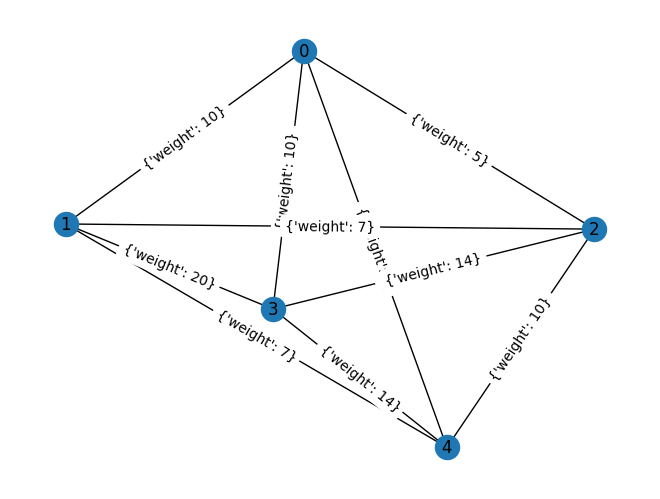

In [7]:
routing.graph_vis.save_graph_from_matrix(
    matrix = [
    [0, 10, 5, 10, 5], 
    [14, 0, 7, 20, 7], 
    [10, 14, 0, 14, 10], 
    [7, 20, 7, 0, 14], 
    [5, 10, 5, 10, 0]
    ],
    figure_path_relative= 'testytest.pdf'
)

In [8]:
distance_matrix = [[0.0, 7884.37, 4044.07, 5455.42],
 [7755.53, 0.0, 3037.68, 4007.69],
 [3925.67, 2961.43, 0.0, 6234.41],
 [5196.67, 3753.86, 5953.24, 0.0]]

In [9]:
duration_matrix = [[0.0, 999.5, 677.44, 717.34],
 [919.25, 0.0, 521.11, 515.12],
 [663.53, 519.84, 0.0, 856.62],
 [683.82, 524.85, 845.77, 0.0]]

In [32]:
distance_matrix

[[0.0, 7884.37, 4044.07, 5455.42],
 [7755.53, 0.0, 3037.68, 4007.69],
 [3925.67, 2961.43, 0.0, 6234.41],
 [5196.67, 3753.86, 5953.24, 0.0]]

'/Users/marv/Documents/uni/bua/relief-routing-models/duration_matrix.pdf'

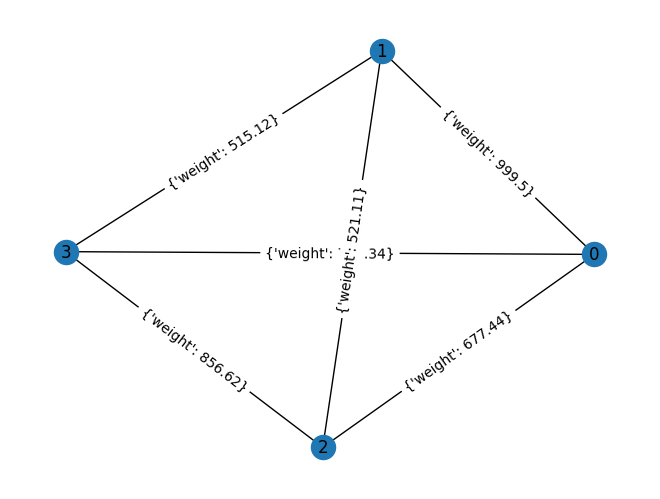

In [11]:
routing.graph_vis.save_graph_from_matrix(
    matrix = duration_matrix,
    figure_path_relative= 'duration_matrix.pdf'
)

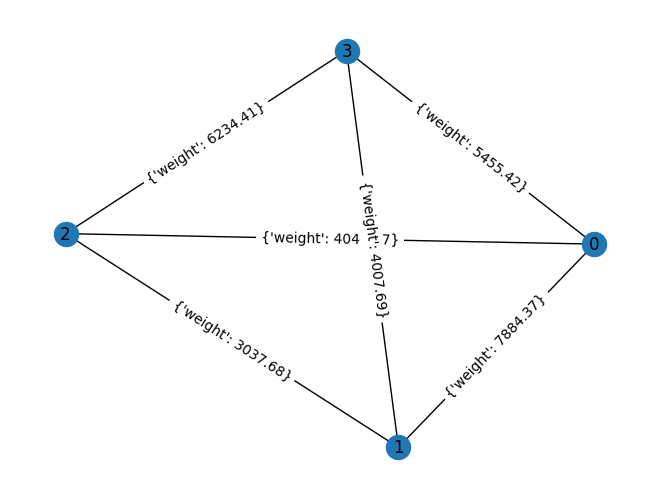

In [29]:
routing.graph_vis.visualize_graph_from_matrix(
    matrix = distance_bidirectional,
    # figure_path_relative= 'distance_matrix.pdf'
)

In [35]:
matrix_big = [
    [0, 200, 300, 600, 3999, 7000, 4000, 300, 500],
    [123, 0, 234, 2345, 9233, 23908, 234, 243, 848],
    [123, 0, 0, 345, 933, 238, 23234, 2243, 23848],
    [123, 0, 0, 0, 12933, 23348, 244, 2543, 223848],
    [123, 0, 0, 0, 0, 234, 544, 2593, 89238],
    [123, 0, 0, 0, 0, 0, 5442, 254, 238],
    [123, 0, 0, 0, 0, 0, 0, 204, 203],
    [123, 0, 0, 0, 0, 0, 0, 0, 874],
    [123, 0, 0, 0, 0, 0, 0, 0, 0],
]

In [38]:
adj_matrix_big = routing.graph_vis.create_symmetric_adjacency_matrix(matrix_big)
adj_matrix_big

array([[     0,    200,    300,    600,   3999,   7000,   4000,    300,
           500],
       [   200,      0,    234,   2345,   9233,  23908,    234,    243,
           848],
       [   300,    234,      0,    345,    933,    238,  23234,   2243,
         23848],
       [   600,   2345,    345,      0,  12933,  23348,    244,   2543,
        223848],
       [  3999,   9233,    933,  12933,      0,    234,    544,   2593,
         89238],
       [  7000,  23908,    238,  23348,    234,      0,   5442,    254,
           238],
       [  4000,    234,  23234,    244,    544,   5442,      0,    204,
           203],
       [   300,    243,   2243,   2543,   2593,    254,    204,      0,
           874],
       [   500,    848,  23848, 223848,  89238,    238,    203,    874,
             0]])

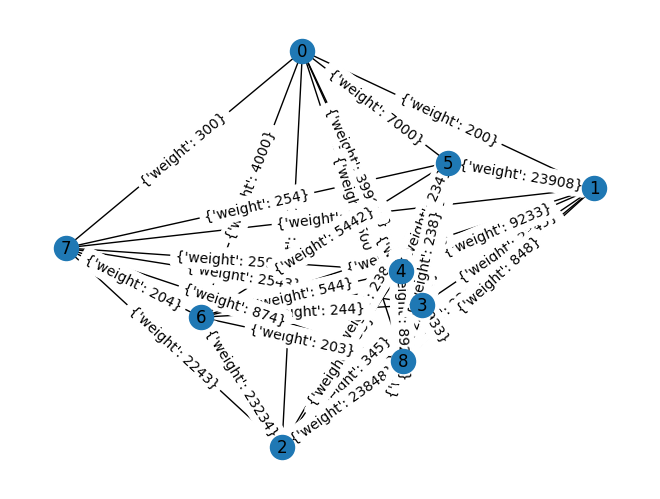

In [39]:
routing.graph_vis.visualize_graph_from_matrix(adj_matrix_big)

In [43]:
steps_list = [(0, 1, 200),
 (1, 2, 234),
 (2, 5, 238),
 (5, 4, 234),
 (4, 6, 544),
 (6, 8, 203),
 (8, 7, 874),
 (7, 3, 2543)]

In [44]:
import networkx as nx

{(0, 1): Text(0.8988648675941053, 0.5641995731525212, "{'weight': 200}"),
 (1, 2): Text(0.6760322365126437, 0.3489609906852757, "{'weight': 234}"),
 (2, 5): Text(0.4132131359553115, 0.13728756445440327, "{'weight': 238}"),
 (5, 4): Text(0.11575818594050515, -0.059879651302143844, "{'weight': 234}"),
 (4, 6): Text(-0.1543622397473189, -0.20595250789483893, "{'weight': 544}"),
 (6, 8): Text(-0.44169163686235147, -0.2940009639757313, "{'weight': 203}"),
 (8, 7): Text(-0.7040218261412728, -0.3308214690330895, "{'weight': 874}"),
 (7, 3): Text(-0.8500987855907972, -0.33018157761803013, "{'weight': 2543}")}

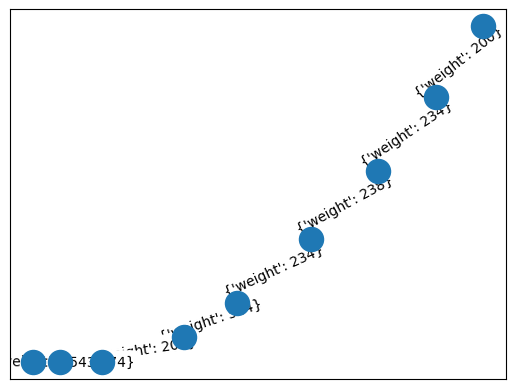

In [61]:
G = nx.Graph()
G.add_weighted_edges_from(
    ebunch_to_add= steps_list
)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos=pos)

In [4]:
import importlib
import solver.inexact_solver
import solver.exact_solver
importlib.reload(solver.inexact_solver)
importlib.reload(solver.exact_solver)
import numpy as np

In [5]:
# Example usage
distance_matrix = np.array([
    [0, 10, 5, 10, 5],
    [14, 0, 7, 20, 7],
    [10, 14, 0, 14, 10],
    [7, 20, 7, 0, 14],
    [5, 10, 5, 10, 0]
])

# distance_matrix = np.array([
#     [1, 2, 3, 4, 5],
#     [2, 3, 4, 5, 1],
#     [3, 4, 5, 1, 2],
#     [4, 5, 1, 2, 3],
#     [5, 1, 2, 3, 4]
# ])

demands = [0, 2, 4, 3, 1]  # Demands at nodes (excluding the depot)
vehicle_capacity = 6  # Capacity of each vehicle
num_vehicles = 2  # Number of vehicles

deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # 3: None,  # Node 3 has no deadline
    # 4: None  # Node 4 has no deadline
}

infeasible_nodes = {
    0: [1],  # Nodes that vehicle 0 cannot visit
    1: [3, 4]   # Nodes that vehicle 1 cannot visit
}



In [38]:
minsum = solver.inexact_solver.minsum_insertion_algorithm(distance_matrix, demands, vehicle_capacity, num_vehicles)
solver.inexact_solver.print_route_and_costs(distance_matrix, minsum)

Vehicle 1 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27
Vehicle 2 - Route: [0] -> Node 4 -> Node 3 -> [0], Cost: 22


In [53]:
feasibilities = solver.inexact_solver.minsum_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, num_vehicles, infeasible_nodes)
solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 1 -> [0], Cost: 24


In [57]:
deadlines = solver.inexact_solver.minsum_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines
)
solver.inexact_solver.print_route_and_costs(distance_matrix, deadlines[0])

Vehicle 1 - Route: [0] -> Node 3 -> Node 4 -> [0], Cost: 29
Vehicle 2 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27


In [29]:
feasibilities_deadlines = solver.inexact_solver.minsum_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines, infeasible_nodes
)
solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities_deadlines[0])

Vehicle 1 - Route: [0] -> Node 3 -> Node 4 -> [0], Cost: 29
Vehicle 2 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27


In [50]:
minmax = solver.inexact_solver.minmax_insertion_algorithm(distance_matrix, demands, vehicle_capacity, num_vehicles)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax)

Vehicle 1 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27
Vehicle 2 - Route: [0] -> Node 4 -> Node 3 -> [0], Cost: 22


In [51]:
minmax_feasibilities = solver.inexact_solver.minmax_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, num_vehicles, infeasible_nodes)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 1 -> Node 3 -> [0], Cost: 37


In [77]:
minmax_deadlines = solver.inexact_solver.minmax_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines
)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_deadlines)

Vehicle 1 - Route: [0] -> Node 2 -> [0], Cost: 15
Vehicle 2 - Route: [0] -> Node 1 -> Node 4 -> Node 3 -> [0], Cost: 34


In [83]:
minmax_feasibilities_deadlines = solver.inexact_solver.minmax_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines, infeasible_nodes
)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities_deadlines)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 1 -> [0], Cost: 24


## exact solver

In [3]:
minmax_gurobi = solver.exact_solver.solve_minmax_vrp(distance_matrix, vehicle_capacity, num_vehicles)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 9 rows, 11 columns and 32 nonzeros
Model fingerprint: 0x08602304
Variable types: 1 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Found heuristic solution: objective 198.0000000
Found heuristic solution: objective 138.0000000
Found heuristic solution: objective 108.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 10 (of 10 available processors)

Solution count 3: 108 138 198 

Optimal sol

In [6]:
minsum_gurobi = solver.exact_solver.solve_minsum_vrp(distance_matrix, vehicle_capacity, num_vehicles)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 7 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x7b182d63
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 7 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 1: 22 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%


---
supply/area

In [52]:
import importlib
import solver.inexact_solver
import solver.exact_solver
importlib.reload(solver.inexact_solver)
importlib.reload(solver.exact_solver)
import numpy as np

In [21]:

values = [2, 5, 7, 10]
size = 10

# Create an empty matrix
matrix = np.zeros((size, size), dtype=int)

# Fill the upper triangular part of the matrix
for i in range(size):
    for j in range(i + 1, size):
        value = values[(i + j) % len(values)]
        matrix[i, j] = value
        matrix[j, i] = value

matrix


array([[ 0,  5,  7, 10,  2,  5,  7, 10,  2,  5],
       [ 5,  0, 10,  2,  5,  7, 10,  2,  5,  7],
       [ 7, 10,  0,  5,  7, 10,  2,  5,  7, 10],
       [10,  2,  5,  0, 10,  2,  5,  7, 10,  2],
       [ 2,  5,  7, 10,  0,  5,  7, 10,  2,  5],
       [ 5,  7, 10,  2,  5,  0, 10,  2,  5,  7],
       [ 7, 10,  2,  5,  7, 10,  0,  5,  7, 10],
       [10,  2,  5,  7, 10,  2,  5,  0, 10,  2],
       [ 2,  5,  7, 10,  2,  5,  7, 10,  0,  5],
       [ 5,  7, 10,  2,  5,  7, 10,  2,  5,  0]])

In [43]:
# Example usage
distance_matrix = matrix

# distance_matrix = np.array([
#     [1, 2, 3, 4, 5],
#     [2, 3, 4, 5, 1],
#     [3, 4, 5, 1, 2],
#     [4, 5, 1, 2, 3],
#     [5, 1, 2, 3, 4]
# ])

demands = [5,5,5,5,5,5,5,5,5,5]  # Demands at nodes (excluding the depot)
vehicle_capacity = 20  # Capacity of each vehicle
num_vehicles = 2  # Number of vehicles

# deadlines = {
#     1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
#     2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
#     3: None,  # Node 3 has no deadline
#     4: None,  # Node 4 has no deadline
#     5: None,  # Node 4 has no deadline
#     6: None,  # Node 4 has no deadline
#     7: None,  # Node 4 has no deadline
#     8: None,  # Node 4 has no deadline
#     9: None,  # Node 4 has no deadline
#     10: None,  # Node 4 has no deadline
# }
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
}

infeasible_nodes = {
    0: [1],  # Nodes that vehicle 0 cannot visit
    1: [3, 4]   # Nodes that vehicle 1 cannot visit
}



### minsum

In [27]:
minsum = solver.inexact_solver.minsum_insertion_algorithm(distance_matrix, demands, vehicle_capacity, num_vehicles)
solver.inexact_solver.print_route_and_costs(distance_matrix, minsum)

Vehicle 1 - Route: [0] -> Node 7 -> Node 5 -> Node 3 -> Node 1 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 4 -> Node 6 -> Node 9 -> Node 2 -> [0], Cost: 38


In [28]:
feasibilities = solver.inexact_solver.minsum_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, num_vehicles, infeasible_nodes)
solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities)

Vehicle 1 - Route: [0] -> Node 4 -> Node 5 -> Node 3 -> Node 6 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 2 -> Node 7 -> Node 1 -> [0], Cost: 21


In [33]:
deadlines = solver.inexact_solver.minsum_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines
)
solver.inexact_solver.print_route_and_costs(distance_matrix, deadlines[0])

Vehicle 1 - Route: [0] -> Node 1 -> Node 6 -> Node 7 -> Node 8 -> [0], Cost: 32
Vehicle 2 - Route: [0] -> Node 4 -> Node 3 -> Node 2 -> Node 9 -> Node 5 -> [0], Cost: 39


In [36]:
feasibilities_deadlines = solver.inexact_solver.minsum_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines, infeasible_nodes
)
solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities_deadlines[0])

Vehicle 1 - Route: [0] -> Node 3 -> Node 4 -> Node 7 -> Node 8 -> [0], Cost: 42
Vehicle 2 - Route: [0] -> Node 5 -> Node 1 -> Node 6 -> Node 9 -> Node 2 -> [0], Cost: 49


### minmax

In [37]:
minmax = solver.inexact_solver.minmax_insertion_algorithm(distance_matrix, demands, vehicle_capacity, num_vehicles)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> Node 3 -> Node 1 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 6 -> Node 7 -> Node 9 -> Node 5 -> [0], Cost: 28


In [38]:
minmax_feasibilities = solver.inexact_solver.minmax_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, num_vehicles, infeasible_nodes)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities)

Vehicle 1 - Route: [0] -> Node 4 -> Node 5 -> Node 3 -> Node 6 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 2 -> Node 7 -> Node 9 -> Node 1 -> [0], Cost: 28


In [39]:
minmax_deadlines = solver.inexact_solver.minmax_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines
)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_deadlines)

Vehicle 1 - Route: [0] -> Node 8 -> Node 4 -> Node 6 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 7 -> Node 5 -> Node 3 -> Node 9 -> Node 1 -> [0], Cost: 28


In [44]:
minmax_feasibilities_deadlines = solver.inexact_solver.minmax_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines, infeasible_nodes
)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities_deadlines)

Vehicle 1 - Route: [0] -> Node 4 -> Node 5 -> Node 3 -> Node 2 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 6 -> Node 7 -> Node 1 -> [0], Cost: 21


### exact implementation

In [49]:
minsum_gurobi = solver.exact_solver.solve_minsum_vrp(distance_matrix, vehicle_capacity, num_vehicles)
solver.exact_solver.print_route_and_costs(distance_matrix, minsum_gurobi)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 12 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xa3796c0f
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 50.0000000
Presolve removed 12 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 2: 32 50 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.200000000000e+01, best bound 3.200000000000e+01, gap 0.0000%
Vehicle 1 - Route: [0, 2, 4, 5, 6, 8, 9], Cost: 41
Vehicle 2 - Route: [1, 3, 7], Cost: 9


In [53]:
minmax_gurobi = solver.exact_solver.solve_minmax_vrp(distance_matrix, vehicle_capacity, num_vehicles)
solver.exact_solver.print_route_and_costs(distance_matrix, minmax_gurobi)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 14 rows, 21 columns and 62 nonzeros
Model fingerprint: 0xce87448f
Variable types: 1 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 444.0000000
Presolve removed 12 rows and 18 columns
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Found heuristic solution: objective 443.0000000

Root relaxation: objective 2.750000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  275.00000    0    1  443.00000

## equity at service

In [61]:
# minsum
# uniformly distributed demands
# vehicles increasing from 2-10;2 steps

for veh in range(2, 12, 2):
    distance_matrix = matrix

    # distance_matrix = np.array([
    #     [1, 2, 3, 4, 5],
    #     [2, 3, 4, 5, 1],
    #     [3, 4, 5, 1, 2],
    #     [4, 5, 1, 2, 3],
    #     [5, 1, 2, 3, 4]
    # ])

    demands = [5,5,5,5,5,5,5,5,5,5]  # Demands at nodes (excluding the depot)
    vehicle_capacity = 20  # Capacity of each vehicle
    num_vehicles = 2  # Number of vehicles

    deadlines = {
        1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
        2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
        3: None,  # Node 3 has no deadline
        4: None,  # Node 4 has no deadline
        5: None,  # Node 4 has no deadline
        6: None,  # Node 4 has no deadline
        7: None,  # Node 4 has no deadline
        8: None,  # Node 4 has no deadline
        9: None,  # Node 4 has no deadline
        10: None,  # Node 4 has no deadline
    }
    # deadlines = {
    #     1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    #     2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # }

    infeasible_nodes = {
        0: [1],  # Nodes that vehicle 0 cannot visit
        1: [3, 4]   # Nodes that vehicle 1 cannot visit
    }

    print(f'---NR OF VEHICLES: {veh}')
    
    print('-minsum basic')
    minsum = solver.inexact_solver.minsum_insertion_algorithm(distance_matrix, demands, vehicle_capacity, veh)
    solver.inexact_solver.print_route_and_costs(distance_matrix, minsum)
    print('-minsum feasibilities')
    minsum_feasibilities = solver.inexact_solver.minsum_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, veh, infeasible_nodes)
    solver.inexact_solver.print_route_and_costs(distance_matrix, minsum_feasibilities)
    print('-minsum deadlines')
    deadlines = solver.inexact_solver.minsum_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, veh, deadlines
    )
    solver.inexact_solver.print_route_and_costs(distance_matrix, deadlines[0])
    # lets reload the matrix
    distance_matrix = matrix

    # distance_matrix = np.array([
    #     [1, 2, 3, 4, 5],
    #     [2, 3, 4, 5, 1],
    #     [3, 4, 5, 1, 2],
    #     [4, 5, 1, 2, 3],
    #     [5, 1, 2, 3, 4]
    # ])

    demands = [5,5,5,5,5,5,5,5,5,5]  # Demands at nodes (excluding the depot)
    vehicle_capacity = 20  # Capacity of each vehicle
    num_vehicles = 2  # Number of vehicles

    deadlines = {
        1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
        2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
        3: None,  # Node 3 has no deadline
        4: None,  # Node 4 has no deadline
        5: None,  # Node 4 has no deadline
        6: None,  # Node 4 has no deadline
        7: None,  # Node 4 has no deadline
        8: None,  # Node 4 has no deadline
        9: None,  # Node 4 has no deadline
        10: None,  # Node 4 has no deadline
    }
    # deadlines = {
    #     1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    #     2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # }

    infeasible_nodes = {
        0: [1],  # Nodes that vehicle 0 cannot visit
        1: [3, 4]   # Nodes that vehicle 1 cannot visit
    }
    print('-minsum feasibilities + deadlines')
    feasibilities_deadlines = solver.inexact_solver.minsum_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, veh, deadlines, infeasible_nodes
    )
    solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities_deadlines[0])


---NR OF VEHICLES: 2
-minsum basic
Vehicle 1 - Route: [0] -> Node 7 -> Node 5 -> Node 3 -> Node 1 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 4 -> Node 6 -> Node 9 -> Node 2 -> [0], Cost: 38
-minsum feasibilities
Vehicle 1 - Route: [0] -> Node 4 -> Node 5 -> Node 3 -> Node 6 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 2 -> Node 7 -> Node 1 -> [0], Cost: 21
-minsum deadlines
Vehicle 1 - Route: [0] -> Node 1 -> Node 6 -> Node 7 -> Node 8 -> [0], Cost: 32
Vehicle 2 - Route: [0] -> Node 4 -> Node 3 -> Node 2 -> Node 9 -> Node 5 -> [0], Cost: 39
-minsum feasibilities + deadlines
Vehicle 1 - Route: [0] -> Node 3 -> Node 4 -> Node 7 -> Node 8 -> [0], Cost: 42
Vehicle 2 - Route: [0] -> Node 5 -> Node 1 -> Node 6 -> Node 9 -> Node 2 -> [0], Cost: 49
---NR OF VEHICLES: 4
-minsum basic
Vehicle 1 - Route: [0] -> Node 9 -> Node 3 -> Node 1 -> [0], Cost: 14
Vehicle 2 - Route: [0] -> Node 6 -> Node 2 -> [0], Cost: 16
Vehicle 3 - Route: [0] -> Node 8 -> Node 4 -> [0], Cost:

In [64]:
# minmax
# uniformly distributed demands
# vehicles increasing from 2-10;2 steps

for veh in range(2, 12, 2):
    distance_matrix = matrix

    # distance_matrix = np.array([
    #     [1, 2, 3, 4, 5],
    #     [2, 3, 4, 5, 1],
    #     [3, 4, 5, 1, 2],
    #     [4, 5, 1, 2, 3],
    #     [5, 1, 2, 3, 4]
    # ])

    demands = [5,5,5,5,5,5,5,5,5,5]  # Demands at nodes (excluding the depot)
    vehicle_capacity = 20  # Capacity of each vehicle
    num_vehicles = 2  # Number of vehicles

    deadlines = {
        1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
        2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
        3: None,  # Node 3 has no deadline
        4: None,  # Node 4 has no deadline
        5: None,  # Node 4 has no deadline
        6: None,  # Node 4 has no deadline
        7: None,  # Node 4 has no deadline
        8: None,  # Node 4 has no deadline
        9: None,  # Node 4 has no deadline
        10: None,  # Node 4 has no deadline
    }
    # deadlines = {
    #     1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    #     2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # }

    infeasible_nodes = {
        0: [1],  # Nodes that vehicle 0 cannot visit
        1: [3, 4]   # Nodes that vehicle 1 cannot visit
    }

    print(f'---NR OF VEHICLES: {veh}')
    print('-minmax basic')
    minmax = solver.inexact_solver.minmax_insertion_algorithm(distance_matrix, demands, vehicle_capacity, veh)
    solver.inexact_solver.print_route_and_costs(distance_matrix, minmax)
    print('-minmax feasibility')
    minmax_feasibilities = solver.inexact_solver.minmax_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, veh, infeasible_nodes)
    solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities)
    print('-minmax deadlines')
    minmax_deadlines = solver.inexact_solver.minmax_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, veh, deadlines
    )
    solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_deadlines)
    distance_matrix = matrix

    # distance_matrix = np.array([
    #     [1, 2, 3, 4, 5],
    #     [2, 3, 4, 5, 1],
    #     [3, 4, 5, 1, 2],
    #     [4, 5, 1, 2, 3],
    #     [5, 1, 2, 3, 4]
    # ])

    demands = [5,5,5,5,5,5,5,5,5,5]  # Demands at nodes (excluding the depot)
    vehicle_capacity = 20  # Capacity of each vehicle
    num_vehicles = 2  # Number of vehicles

    # deadlines = {
    #     1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    #     2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    #     3: None,  # Node 3 has no deadline
    #     4: None,  # Node 4 has no deadline
    #     5: None,  # Node 4 has no deadline
    #     6: None,  # Node 4 has no deadline
    #     7: None,  # Node 4 has no deadline
    #     8: None,  # Node 4 has no deadline
    #     9: None,  # Node 4 has no deadline
    #     10: None,  # Node 4 has no deadline
    # }
    deadlines = {
        1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
        2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    }

    infeasible_nodes = {
        0: [1],  # Nodes that vehicle 0 cannot visit
        1: [3, 4]   # Nodes that vehicle 1 cannot visit
    }

    print('minmax feasibility + deadlines')
    minmax_feasibilities_deadlines = solver.inexact_solver.minmax_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, veh, deadlines, infeasible_nodes
    )
    solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities_deadlines)

---NR OF VEHICLES: 2
-minmax basic
Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> Node 3 -> Node 1 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 6 -> Node 7 -> Node 9 -> Node 5 -> [0], Cost: 28
-minmax feasibility
Vehicle 1 - Route: [0] -> Node 4 -> Node 5 -> Node 3 -> Node 6 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 2 -> Node 7 -> Node 9 -> Node 1 -> [0], Cost: 28
-minmax deadlines
Vehicle 1 - Route: [0] -> Node 8 -> Node 4 -> Node 6 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 7 -> Node 5 -> Node 3 -> Node 9 -> Node 1 -> [0], Cost: 28
minmax feasibility + deadlines
Vehicle 1 - Route: [0] -> Node 4 -> Node 5 -> Node 3 -> Node 2 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 6 -> Node 7 -> Node 1 -> [0], Cost: 21
---NR OF VEHICLES: 4
-minmax basic
Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> Node 3 -> Node 1 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 6 -> Node 7 -> Node 5 -> [0], Cost: 21
Vehicle 3 - Route: [0] -> Node 

In [65]:
for veh in range(2, 12, 2):
    distance_matrix = matrix

    # distance_matrix = np.array([
    #     [1, 2, 3, 4, 5],
    #     [2, 3, 4, 5, 1],
    #     [3, 4, 5, 1, 2],
    #     [4, 5, 1, 2, 3],
    #     [5, 1, 2, 3, 4]
    # ])

    demands = [5,5,5,5,5,5,5,5,5,5]  # Demands at nodes (excluding the depot)
    vehicle_capacity = 20  # Capacity of each vehicle
    num_vehicles = 2  # Number of vehicles

    deadlines = {
        1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
        2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
        3: None,  # Node 3 has no deadline
        4: None,  # Node 4 has no deadline
        5: None,  # Node 4 has no deadline
        6: None,  # Node 4 has no deadline
        7: None,  # Node 4 has no deadline
        8: None,  # Node 4 has no deadline
        9: None,  # Node 4 has no deadline
        10: None,  # Node 4 has no deadline
    }
    # deadlines = {
    #     1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    #     2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # }

    infeasible_nodes = {
        0: [1],  # Nodes that vehicle 0 cannot visit
        1: [3, 4]   # Nodes that vehicle 1 cannot visit
    }

    print(f'---NR OF VEHICLES: {veh}')
    print('-minsum basic')
    minsum = solver.inexact_solver.minsum_insertion_algorithm(distance_matrix, demands, vehicle_capacity, veh)
    solver.inexact_solver.print_route_and_costs(distance_matrix, minsum)
    print('-minsum exact')
    minsum_gurobi = solver.exact_solver.solve_minsum_vrp(distance_matrix, vehicle_capacity, veh)
    solver.exact_solver.print_route_and_costs(distance_matrix, minsum_gurobi)
    print('-minmax basic')
    minmax = solver.inexact_solver.minmax_insertion_algorithm(distance_matrix, demands, vehicle_capacity, veh)
    solver.inexact_solver.print_route_and_costs(distance_matrix, minmax)
    print('-minmax exact')
    minmax_gurobi = solver.exact_solver.solve_minmax_vrp(distance_matrix, vehicle_capacity, num_vehicles)
    solver.exact_solver.print_route_and_costs(distance_matrix, minmax_gurobi)
    
    

---NR OF VEHICLES: 2
-minsum basic
Vehicle 1 - Route: [0] -> Node 7 -> Node 5 -> Node 3 -> Node 1 -> [0], Cost: 21
Vehicle 2 - Route: [0] -> Node 8 -> Node 4 -> Node 6 -> Node 9 -> Node 2 -> [0], Cost: 38
-minsum exact
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 12 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xa3796c0f
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 50.0000000
Presolve removed 12 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 2: 32 50 

Optimal solution